# Import Necessaryh libraries

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

# Import Data

In [23]:
company_data=pd.read_csv('Company_Data.csv')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# Data Understanding

In [24]:
company_data.shape

(400, 11)

In [25]:
company_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [26]:
company_data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [27]:
company_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


# Data Preparation

In [28]:
company_data["sales"]="<=7.5"
company_data.loc[company_data["Sales"]>=7.5,"sales"]="High Sales"
company_data.loc[company_data["Sales"]<=7.5,"sales"]="Low Sales"

In [29]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High Sales
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High Sales
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High Sales
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low Sales
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low Sales
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High Sales
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Low Sales
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Low Sales
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Low Sales


In [30]:
del company_data['Sales']

In [32]:
le = LabelEncoder()
for column_names in company_data.columns:
    if company_data[column_names].dtype == object:
        company_data[column_names] = le.fit_transform(company_data[column_names])
    else:
        pass

In [33]:
company_data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,0
396,139,23,3,37,120,2,55,11,0,1,1
397,162,26,12,368,159,2,40,18,1,1,1
398,100,79,7,284,95,0,50,12,1,1,1


In [34]:
company_data.dtypes

CompPrice      int64
Income         int64
Advertising    int64
Population     int64
Price          int64
ShelveLoc      int32
Age            int64
Education      int64
Urban          int32
US             int32
sales          int32
dtype: object

# Model Building

In [35]:
X= company_data.drop('sales',axis=1)
y=company_data[['sales']]

In [36]:
X.shape,y.shape

((400, 10), (400, 1))

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=12,shuffle=True,stratify=y)

In [38]:
X_train.shape,y_train.shape

((320, 10), (320, 1))

In [39]:
X_test.shape,y_test.shape

((80, 10), (80, 1))

In [41]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

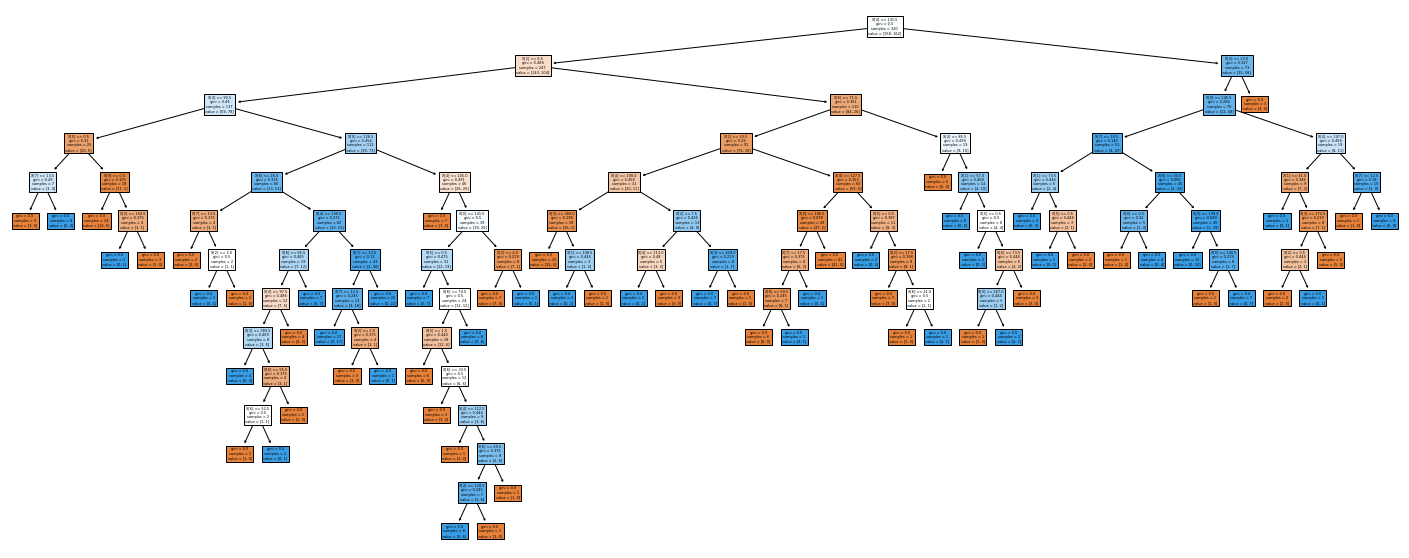

In [45]:
plt.figure(figsize=(25,10))
plot_tree(decision_tree = dt_model,filled=True)
plt.show()

# Model Testing || Model Evaluation

### Training Data

In [46]:
y_pred_train = dt_model.predict(X_train)

In [48]:
accuracy_score(y_train,y_pred_train)

1.0

In [49]:
confusion_matrix(y_train,y_pred_train)

array([[158,   0],
       [  0, 162]], dtype=int64)

In [50]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       158
           1       1.00      1.00      1.00       162

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



1.0


Text(0, 0.5, 'True Positive Rate')

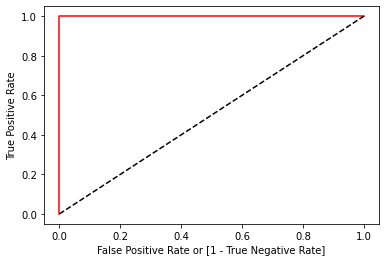

In [52]:
fpr, tpr, thresholds = roc_curve(y_train, dt_model.predict_proba (X_train)[:,1])
auc = roc_auc_score(y_train,y_pred_train)
print(auc)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### Test Data 

In [53]:
y_pred_test = dt_model.predict(X_test)

In [54]:
accuracy_score(y_test,y_pred_test)

0.675

In [55]:
confusion_matrix(y_test,y_pred_test)

array([[26, 14],
       [12, 28]], dtype=int64)

In [56]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.68      0.65      0.67        40
           1       0.67      0.70      0.68        40

    accuracy                           0.68        80
   macro avg       0.68      0.68      0.67        80
weighted avg       0.68      0.68      0.67        80



0.6749999999999999


Text(0, 0.5, 'True Positive Rate')

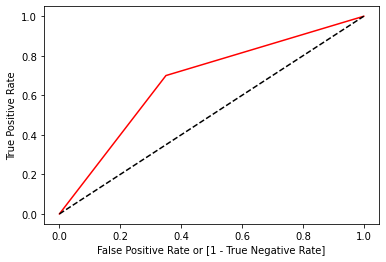

In [57]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
auc = roc_auc_score(y_test,y_pred_test)
print(auc)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### We can see model over fitting problem by looking in to accuracy score of train data and test data to over come over fitting problem we need to tweake the hyperparamsters we can come to optimal value of hyperparamaters using grid searchCV

In [59]:
grid_search = GridSearchCV(estimator = dt_model, 
                           param_grid = {'criterion':['entropy','gini'],
                                         'max_depth':[2,3,4,5,6,7,8,9,10]})
grid_search.fit(X,y)

print(grid_search.best_params_)

print(grid_search.best_score_)


{'criterion': 'entropy', 'max_depth': 8}
0.7325


# Model Building

In [62]:
dt_model_1 = DecisionTreeClassifier(criterion='entropy',max_depth=8)
dt_model_1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

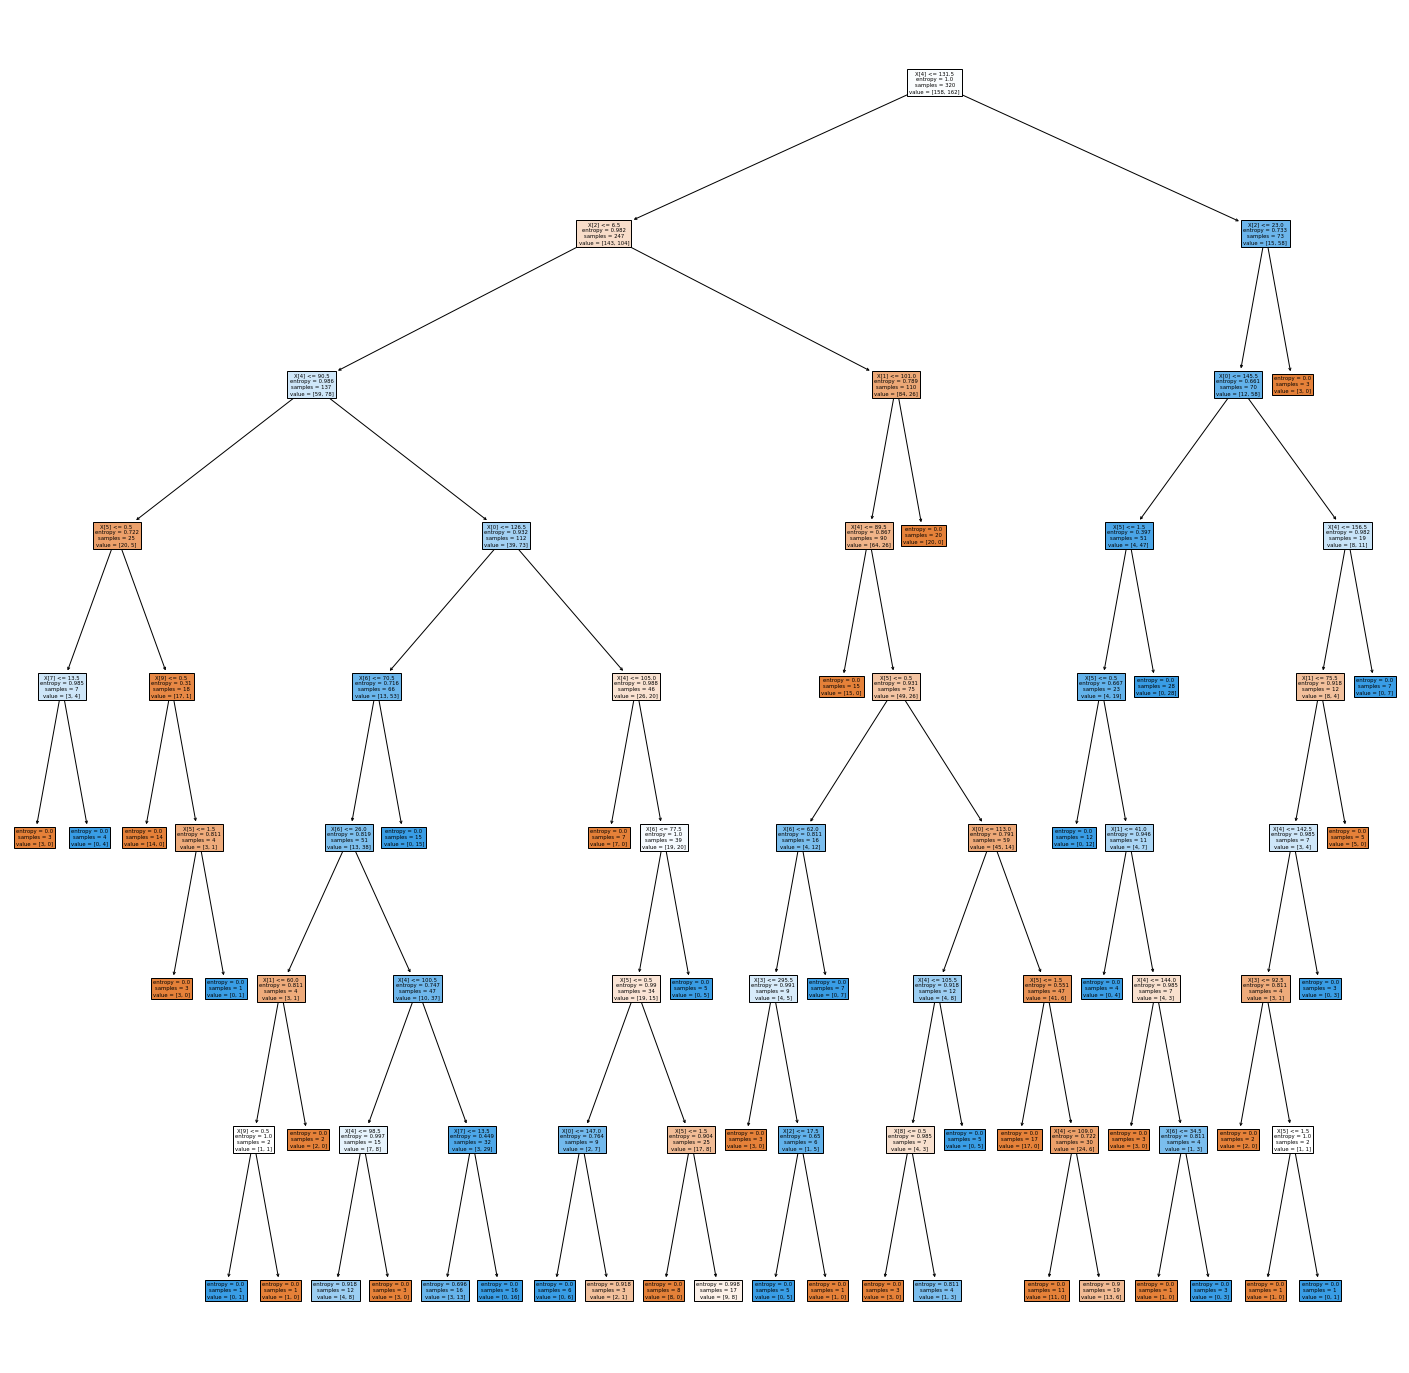

In [63]:
plt.figure(figsize=(25,25))
plot_tree(decision_tree = dt_model_1,filled=True)
plt.show()

# Model Testing || Model Evaluation

### Training Data

In [64]:
y_pred_train_1 = dt_model_1.predict(X_train)

In [65]:
accuracy_score(y_train,y_pred_train_1)

0.928125

In [66]:
confusion_matrix(y_train,y_pred_train_1)

array([[150,   8],
       [ 15, 147]], dtype=int64)

In [67]:
print(classification_report(y_train,y_pred_train_1))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       158
           1       0.95      0.91      0.93       162

    accuracy                           0.93       320
   macro avg       0.93      0.93      0.93       320
weighted avg       0.93      0.93      0.93       320



0.9283872480075012


Text(0, 0.5, 'True Positive Rate')

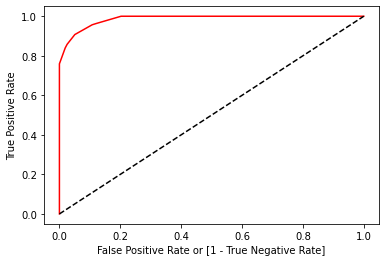

In [68]:
fpr, tpr, thresholds = roc_curve(y_train, dt_model_1.predict_proba (X_train)[:,1])
auc = roc_auc_score(y_train,y_pred_train_1)
print(auc)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### Test Data 

In [69]:
y_pred_test_1 = dt_model_1.predict(X_test)

In [70]:
accuracy_score(y_test,y_pred_test_1)

0.775

In [71]:
confusion_matrix(y_test,y_pred_test_1)

array([[31,  9],
       [ 9, 31]], dtype=int64)

In [72]:
print(classification_report(y_test,y_pred_test_1))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        40
           1       0.78      0.78      0.78        40

    accuracy                           0.78        80
   macro avg       0.78      0.78      0.78        80
weighted avg       0.78      0.78      0.78        80



0.7749999999999999


Text(0, 0.5, 'True Positive Rate')

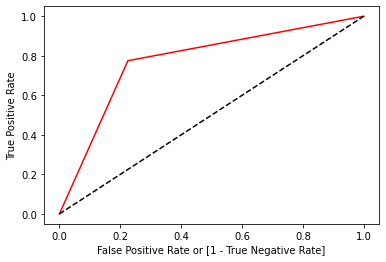

In [73]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_1)
auc = roc_auc_score(y_test,y_pred_test_1)
print(auc)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

# Model Deployement

In [74]:
from pickle import dump

In [75]:
dump(dt_model_1,open('dt_intel.pkl','wb'))

In [76]:
from pickle import load

In [77]:
loaded_intell_file = load(open('dt_intel.pkl','rb'))

In [78]:
y_pred_new_sample = loaded_intell_file.predict(X_test)

In [79]:
accuracy_score(y_test,y_pred_new_sample)

0.775

# THE END!!